In [1]:
import numpy as np
import pandas as pd

from scipy import sparse
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('metacriticfortuning.csv', index_col='Unnamed: 0')

In [35]:
df['reviewer_name'].unique()

array(['GamingXP', 'LEVEL (Czech Republic)', 'PC Master (Greece)', ...,
       'GuilhermeLeme13', 'Andrea', 'skulltulainahat'], dtype=object)

In [4]:
#Old Dataset has an average of 2.59 reviews per person...
np.mean(df.reviewer_id.value_counts())

2.592250295767884

In [5]:
#Old Dataset has 221303 reviews...
len(df)

221303

In [6]:
#Old Dataset has 85371 reviewers...
revcount = df.reviewer_id.value_counts()
print revcount

37       2446
34       2417
4        2308
30       1365
87       1130
36       1109
1        1027
61       1025
40        965
188       954
158       864
59        856
62        855
41        844
196       817
82        806
33        805
354       803
189       793
159       786
57        779
148       754
79        747
142       719
81        709
547       705
38        687
270       654
63        635
167       632
         ... 
12618       1
27894       1
332         1
4430        1
59729       1
45274       1
63827       1
49492       1
51541       1
53590       1
41304       1
43353       1
18757       1
28994       1
24896       1
71919       1
69870       1
67821       1
65772       1
80107       1
78058       1
76009       1
73960       1
84197       1
82148       1
39135       1
35037       1
32988       1
47323       1
2047        1
Name: reviewer_id, Length: 85371, dtype: int64


In [7]:
# I'm making a bad_df consisting of all the reviewers with less than two reviews.
bad_df = df.groupby('reviewer_id').filter(lambda x: len(x) < 2)

In [8]:
bad_df.head()

,is_critic,reviewer_name,reviewer_score,url,title,norm_score,genre,reviewer_id
4451,0,theWrath,0,007-legends,007 Legends (PC),0,"Action, Shooter, First-Person, Modern, Arcade",5
4526,0,MSUpilot,0,007-legends,007 Legends (PC),0,"Action, Shooter, First-Person, Modern, Arcade",11
4534,0,portek20,10,007-legends,007 Legends (PC),10,"Action, Shooter, First-Person, Modern, Arcade",14
4691,0,DiabloZiri,3,007-legends,007 Legends (PC),3,"Action, Shooter, First-Person, Modern, Arcade",26
17520,0,hahahahaha,8,007-nightfire,007: NightFire (PC),8,"Action, Shooter, First-Person, Modern, Arcade",46


## Let's drop everyone who's reviewd less than 5 games...

In [9]:
df = df.groupby('reviewer_id').filter(lambda x: len(x) >= 5)

In [10]:
#New Dataset has an average of 2.59 reviews per person...
print "average reviews per person:"
print np.mean(df.reviewer_id.value_counts())
print
#New Dataset has 221303 reviews...
print "length of dataframe:"
print len(df)
print
#New Dataset has 85371 reviewers...
print "top reviewers:"
print df.reviewer_id.value_counts()

average reviews per person:
24.8106847573

length of dataframe:
117032

top reviewers:
37       2446
34       2417
4        2308
30       1365
87       1130
36       1109
1        1027
61       1025
40        965
188       954
158       864
59        856
62        855
41        844
196       817
82        806
33        805
354       803
189       793
159       786
57        779
148       754
79        747
142       719
81        709
547       705
38        687
270       654
63        635
167       632
         ... 
25846       5
2659        5
27183       5
23081       5
4640        5
43511       5
29184       5
3259        5
38815       5
11528       5
9086        5
15101       5
11007       5
12709       5
23878       5
6496        5
15754       5
20596       5
22824       5
22632       5
22407       5
31733       5
43062       5
25590       5
5711        5
6048        5
20331       5
50938       5
12007       5
45389       5
Name: reviewer_id, Length: 4717, dtype: int64


In [11]:
df.head()

,is_critic,reviewer_name,reviewer_score,url,title,norm_score,genre,reviewer_id
0,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
1,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
2,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
3,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0
4,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0


## After trimming off the reviewers..

In [12]:
df.norm_score.value_counts(sort=False)

0      3055
1      1480
2      1872
3      2821
4      4663
5      7095
6     11520
7     19450
8     28973
9     23403
10    12700
Name: norm_score, dtype: int64

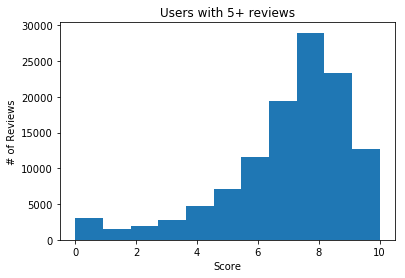

In [13]:
plt.hist(df.norm_score, bins=11)
plt.title("Users with 5+ reviews")
plt.xlabel("Score")
plt.ylabel("# of Reviews")

## Reviewers that were trimmed off

In [14]:
bad_df.norm_score.value_counts(sort=False)

0     11976
1      3554
2      2455
3      2420
4      2098
5      2201
6      1954
7      2605
8      4879
9      8979
10    21700
Name: norm_score, dtype: int64

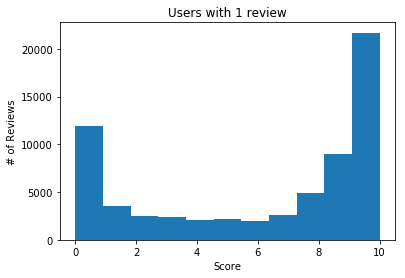

In [15]:
plt.hist(bad_df.norm_score, bins=11);
plt.title("Users with 1 review")
plt.xlabel("Score")
plt.ylabel("# of Reviews")

# Setting up a pivot table

In [16]:
pivot = df.pivot_table(index='reviewer_id', columns='title', values='norm_score')
pivot.shape

(4717, 4457)

In [17]:
pivot.fillna(0).values
pivot.shape

(4717, 4457)

In [18]:
pivot.head()

title,007 Legends (PC),007: NightFire (PC),007: Quantum of Solace (PC),0RBITALIS (PC),10 Second Ninja (PC),"10,000,000 (PC)",1001 Spikes (PC),12 is Better Than 6 (PC),140 (PC),15 Days (PC),...,Zoo Tycoon: Marine Mania (PC),Zuma's Revenge! (PC),continue?9876543210 (PC),iRacing (PC),imprint-X (PC),inMomentum (PC),kill.switch (PC),nail'd (PC),rymdkapsel (PC),theHunter: Call of the Wild (PC)
reviewer_id,,,,,,,,,,,,,,,,,,,,,
0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
1,3.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,6.0,8.0,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,7.0,8.0,NaN,6.0


In [19]:
euclidean_distances(pivot.iloc[0].fillna(0), pivot.iloc[5].fillna(0))

/Users/fen/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/fen/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 151.46616784]])

In [20]:
A = 2
print df.reviewer_name[A]
print
print pivot.iloc[A][:6]

GamingXP

title
007 Legends (PC)               3.0
007: NightFire (PC)            NaN
007: Quantum of Solace (PC)    NaN
0RBITALIS (PC)                 NaN
10 Second Ninja (PC)           NaN
10,000,000 (PC)                NaN
Name: 2, dtype: float64


In [21]:
pivotsparse = sparse.csc_matrix(pivot.fillna(0).values)

In [22]:
pivot.fillna(0).shape

(4717, 4457)

In [23]:
print pivotsparse[800] #Scipy Sparse
print pivot.iloc[800].dropna()

  (0, 111)	7.0
  (0, 166)	2.0
  (0, 376)	5.0
  (0, 718)	7.0
  (0, 1480)	8.0
  (0, 3046)	9.0
  (0, 3543)	7.0
  (0, 3644)	8.0
  (0, 3772)	8.0
  (0, 3882)	7.0
  (0, 4330)	7.0
title
Alan Wake's American Nightmare (PC)    7.0
Amnesia: A Machine for Pigs (PC)       2.0
Battlefield 3 (PC)                     5.0
Clive Barker's Jericho (PC)            7.0
Far Cry 3 (PC)                         8.0
Quantum Conundrum (PC)                 9.0
Starcraft II: Wings of Liberty (PC)    7.0
Syndicate (2012) (PC)                  8.0
The Elder Scrolls V: Skyrim (PC)       8.0
The Secret World (PC)                  7.0
Wolfenstein: The New Order (PC)        7.0
Name: 2085, dtype: float64


In [27]:
# I put the pivotsparse in NearestNeighbors and checked the for the closest neighbors around user_id 800.
X = pivotsparse
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nbrs.kneighbors(pivotsparse[960])
print distances
print "-"*20
print indices

[[  0.          15.74801575  16.09347694  16.76305461  16.76305461]]
--------------------
[[ 960 3914  963 4264  735]]


In [29]:
# Users similar to 960 (I will later accept a user input that will be fed into the DF)
print pivot.iloc[960].dropna()
print "*"*40
#suggestions from other users...
print pivot.iloc[3914].dropna()
print "-"*40
print pivot.iloc[963].dropna()
print "-"*40
print pivot.iloc[4264].dropna()
print "-"*40
print pivot.iloc[735].dropna()

#Need to find a way to normalize the scores and penalize lower scores.

title
Aliens vs. Predator (PC)                8.0
Big Rigs: Over the Road Racing (PC)     0.0
Left 4 Dead (PC)                       10.0
Left 4 Dead 2 (PC)                     10.0
Star Trek Online (PC)                   1.0
Wolfenstein (PC)                        4.0
Name: 2670, dtype: float64
****************************************
title
Dead by Daylight (PC)             10.0
Friday the 13th: The Game (PC)     6.0
Grand Theft Auto V (PC)            2.0
Left 4 Dead (PC)                   9.0
Left 4 Dead 2 (PC)                 5.0
Tactical Intervention (PC)         1.0
Name: 25787, dtype: float64
----------------------------------------
title
Aliens vs. Predator (PC)                8.0
Call of Duty: Modern Warfare 2 (PC)     5.0
Empire: Total War (PC)                  6.0
Left 4 Dead (PC)                       10.0
Tropico 3 (PC)                          9.0
Name: 2683, dtype: float64
----------------------------------------
title
Dota 2 (PC)                                  0.0
FTL:

In [26]:
# Dead by Daylight is a good suggestion
# Tropico 3 (dunno about this?)
# last 2 reviewers are useless...

## Need to do more cleaning and adjusting...
I may split paths here just in case I run into a dead end, but I will try to drop reviewers with an average review score of less than 4. I will aslo consider averaging the reviewer scores for each user and using that to weigh against some of the 0's. My Alternative path will consist of keeping more reviewers (bringing back users that have at least 3 reviews) and getting rid of scores that are less than 7.